In [1]:
#poczytać magic functions
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
def std_dev_and_igr_outlier_plots(input_data, column):
      
    plt.plot(input_data['Formatted Date'], input_data[column])

    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(column + ' over time')


    if f"IQR_Outlier_{column}" in input_data.columns:
        index_iqr = input_data[f"IQR_Outlier_{column}"]
        plt.plot(input_data.loc[index_iqr,'Formatted Date'], input_data.loc[index_iqr,column], 'go', markersize=5)

    if f"STD_DEV_Outlier_{column}" in input_data.columns:
        index_std_dev = input_data[f"STD_DEV_Outlier_{column}"]
        plt.plot(input_data.loc[index_std_dev,'Formatted Date'], input_data.loc[index_std_dev,column], 'ro', markersize=3)

    plt.show()

In [4]:
def replace_outliers_with_NaNs(input_data, outlier_range, column):
    
#     input_data.loc[
#         (input_data[column] >= outlier_range[0]) & (input_data[column] <= outlier_range[1]), 
#         column] = np.nan
    input_data.loc[
        input_data[column].between(outlier_range[0],outlier_range[1], inclusive = 'both'),
        column] = np.nan
    return input_data


In [5]:
 def visualize_with_seaborn(input_data, columns):
        sns.distplot(input_data[column])
        plt.show()

In [6]:
sep = ','
decimal = '.'
weather_data = 'C:/Users/Ania/Desktop/weather_project/weather_history.csv'

In [7]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\DataCleaningProgram")
    
from data_loader import DataLoader


dl = DataLoader(coefficient_nulls_removal=90,
                date_column_name=['Formatted Date'],
                outliers_columns=['Temperature (C)',
                                   'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                                   'Wind Bearing (degrees)', 'Visibility (km)',
                                   'Pressure (millibars)'],)

input_data = dl.get_initial_data(input_data_path=weather_data, sep=sep, decimal=decimal)
input_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [8]:
#drop Loud Cover as it shows no values
input_data = input_data.drop('Loud Cover', axis=1)
input_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


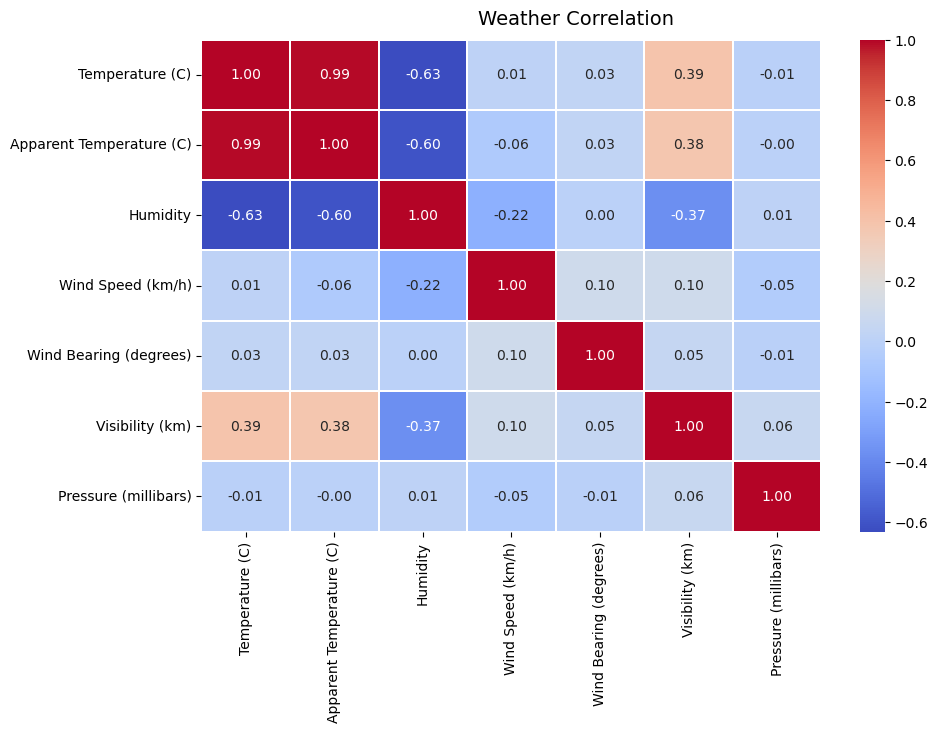

In [9]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = input_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Weather Correlation', fontsize=14)

# Checking basics about the dataset

In [10]:
#shows datatypes
input_data.info()

#total number of rows and columns
input_data.shape

#useful function to check different metrics at fast
input_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


# Find outliers and missing data/ drop unndecesary data 

In [11]:
#finding outliers with std dev
input_data = dl.outliers_standard_deviation(input_data)
print(input_data.columns)

#finding outliers with IQR
input_data = dl.outliers_find_iqr(input_data)
print(input_data.columns)
input_data





Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'STD_DEV_Outlier_Temperature (C)',
       'STD_DEV_Outlier_Apparent Temperature (C)', 'STD_DEV_Outlier_Humidity',
       'STD_DEV_Outlier_Wind Speed (km/h)',
       'STD_DEV_Outlier_Wind Bearing (degrees)',
       'STD_DEV_Outlier_Visibility (km)',
       'STD_DEV_Outlier_Pressure (millibars)'],
      dtype='object')
Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'STD_DEV_Outlier_Temperature (C)',
       'STD_DEV_Outlier_Apparent Temperature (C)', 'STD_DEV_Outlier_Humidity',
       'STD_DEV_Outlier_Wind Speed (km/h)',
       'STD_DEV_Outlier_Wind Bearing (degrees)'

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),...,STD_DEV_Outlier_Wind Bearing (degrees),STD_DEV_Outlier_Visibility (km),STD_DEV_Outlier_Pressure (millibars),IQR_Outlier_Temperature (C),IQR_Outlier_Apparent Temperature (C),IQR_Outlier_Humidity,IQR_Outlier_Wind Speed (km/h),IQR_Outlier_Wind Bearing (degrees),IQR_Outlier_Visibility (km),IQR_Outlier_Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,...,False,False,False,False,False,False,False,False,False,False
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,...,False,False,False,False,False,False,False,False,False,False
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,...,False,False,False,False,False,False,False,False,False,False
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,...,False,False,False,False,False,False,False,False,False,False
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,...,False,False,False,False,False,False,False,False,False,False
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,...,False,False,False,False,False,False,False,False,False,False
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,...,False,False,False,False,False,False,False,False,False,False
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#spradzamy ilość aoutierów True
input_data[[column for column in input_data.columns if "Outlier" in column]].sum()



STD_DEV_Outlier_Temperature (C)               39
STD_DEV_Outlier_Apparent Temperature (C)      40
STD_DEV_Outlier_Humidity                      28
STD_DEV_Outlier_Wind Speed (km/h)           1208
STD_DEV_Outlier_Wind Bearing (degrees)         0
STD_DEV_Outlier_Visibility (km)                0
STD_DEV_Outlier_Pressure (millibars)        1288
IQR_Outlier_Temperature (C)                   44
IQR_Outlier_Apparent Temperature (C)          22
IQR_Outlier_Humidity                          46
IQR_Outlier_Wind Speed (km/h)               3028
IQR_Outlier_Wind Bearing (degrees)             0
IQR_Outlier_Visibility (km)                    0
IQR_Outlier_Pressure (millibars)            4400
dtype: int64

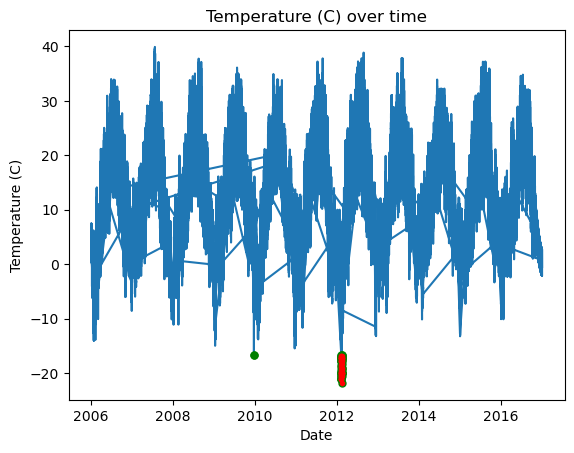

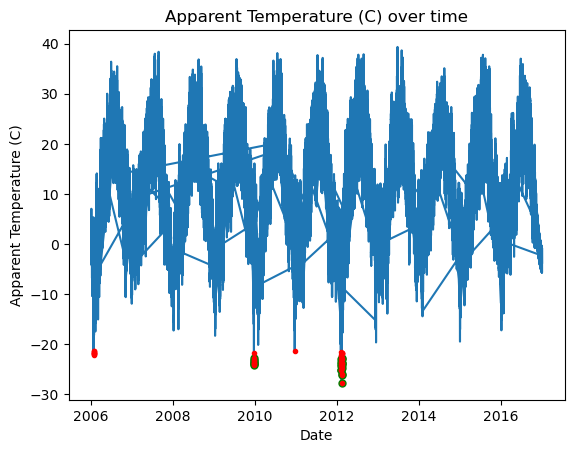

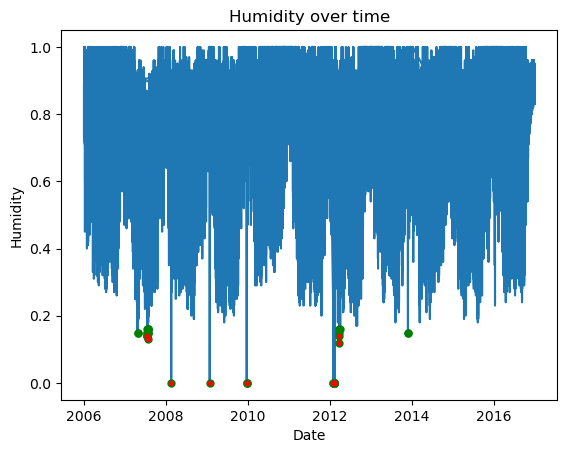

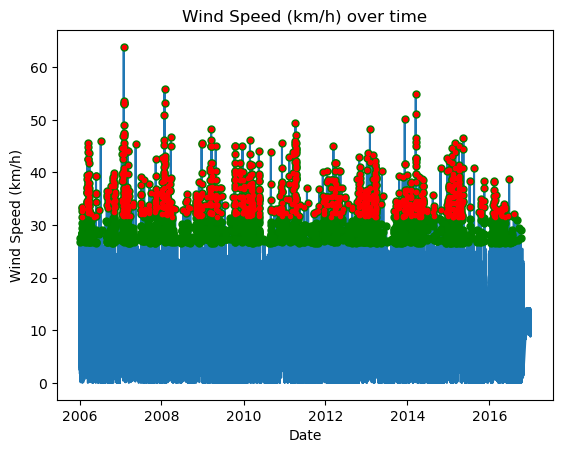

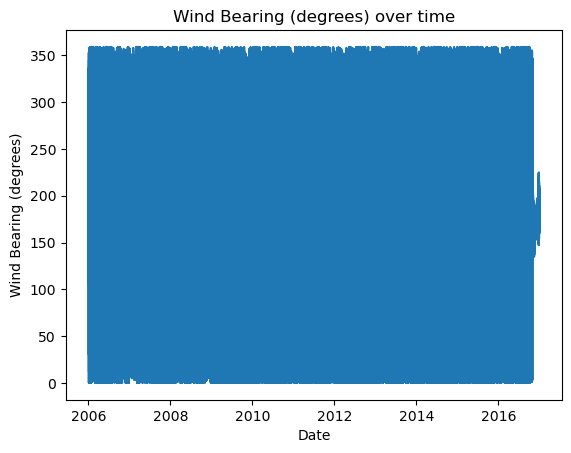

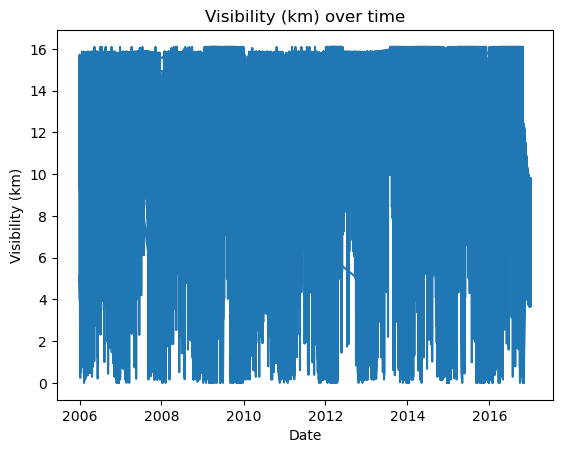

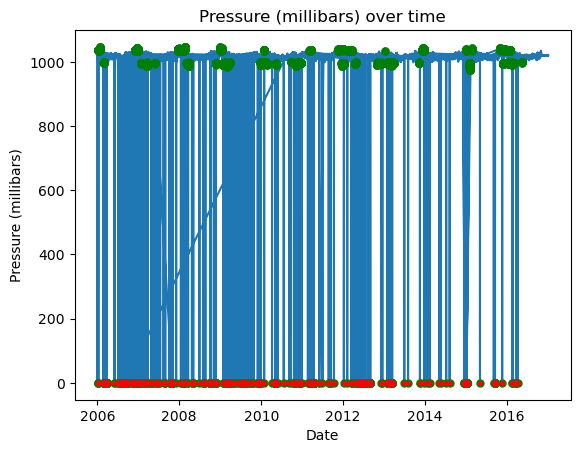

In [13]:
#change date to datetime
input_data = dl.parse_dates(input_data)


#ubrać to w funkcę by dodać dla innych kolumn. 
#jeżeli nie będzie IQR outlier kolumny to funkcja idzie dalej ...musi być if
#===============================================================

selected_columns = ['Temperature (C)', 'Apparent Temperature (C)','Humidity', 'Wind Speed (km/h)', 
                    'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)' ]


for column in selected_columns:
    std_dev_and_igr_outlier_plots(input_data, column)                 

In [14]:
input_data = replace_outliers_with_NaNs(input_data, outlier_range=(0,0), column = 'Humidity')
input_data = replace_outliers_with_NaNs(input_data, outlier_range=(0,800), column = 'Pressure (millibars)')
print(input_data[column].isna().sum())

#obczaić seaborn od histogramy i scatterploty w seaborn of razu
#zrobić takie same wykresy -funkcja! - histogramy tych wartości

1288


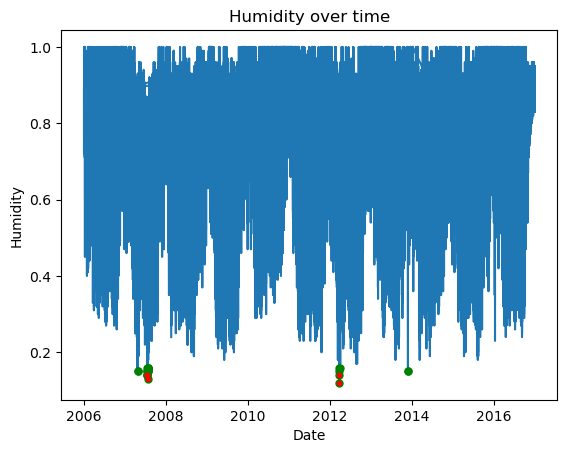

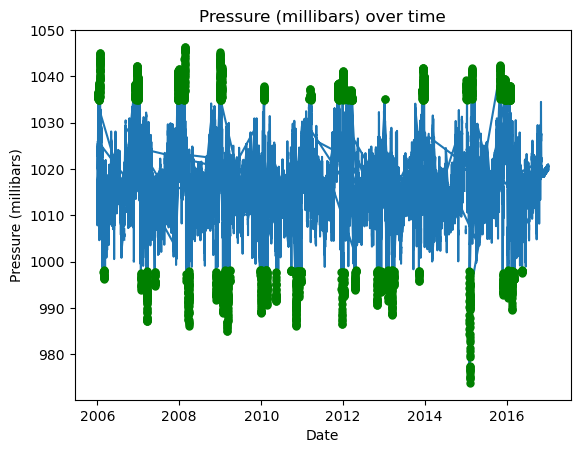

In [15]:
selected_columns = ['Humidity', 'Pressure (millibars)' ]


for column in selected_columns:
    std_dev_and_igr_outlier_plots(input_data, column) 

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


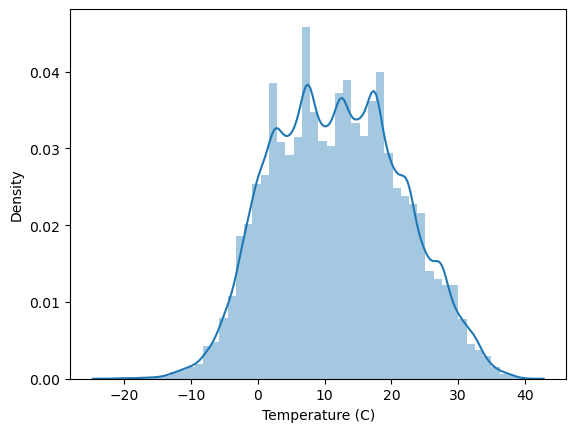

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


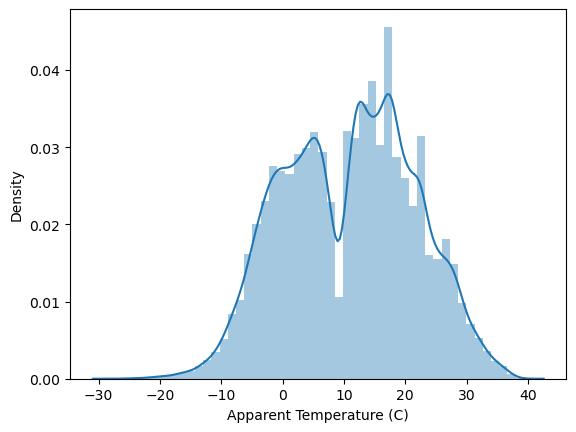

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


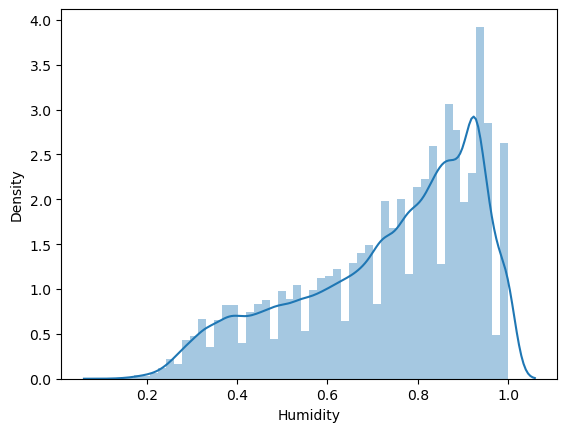

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


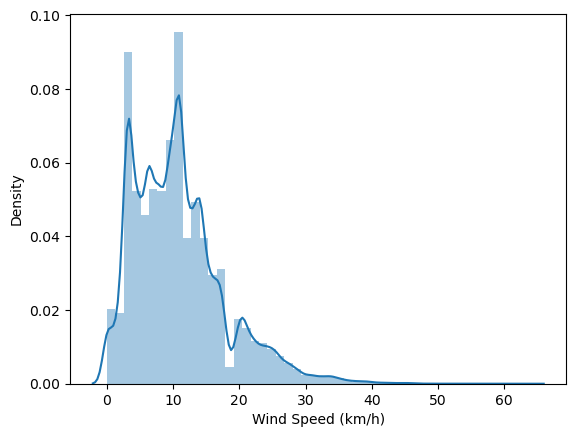

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


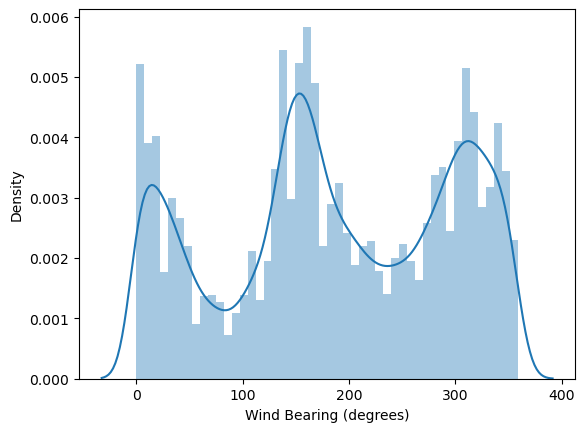

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


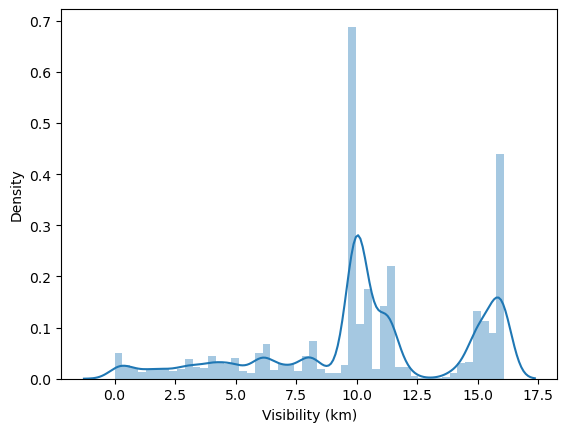

C:\Users\Ania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


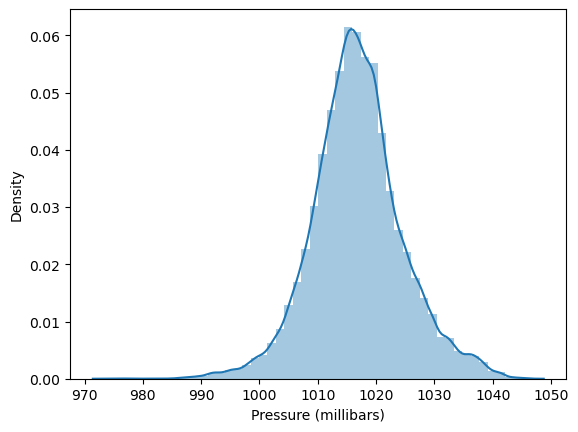

In [16]:
#Seaborn

#Histograms
selected_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                    'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
                    'Pressure (millibars)']

for column in selected_columns:
    visualize_with_seaborn(input_data, column)
    

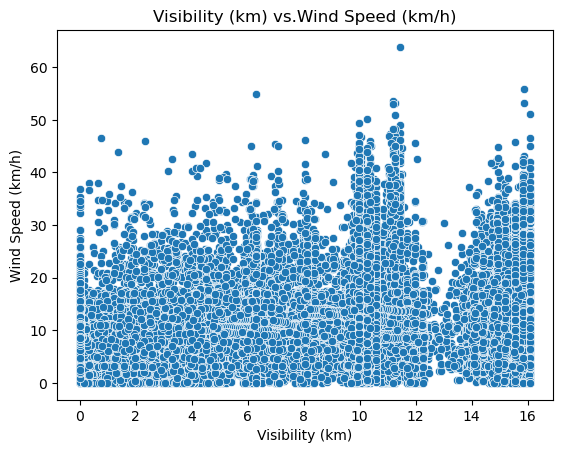

In [17]:
#Scatterplot for selected columns

column_1 = 'Visibility (km)'
column_2 = 'Wind Speed (km/h)'


def scatterplot_two_dimensions(input_data, column_1, column_2):
    
    ax = sns.scatterplot(data=input_data, x=column_1, y=column_2, palette = {"red": "#FF9999", "white": "#FFE888"})
    ax.set_title(f'{column_1} vs.{column_2}')
    
    plt.show()
    
scatterplot_two_dimensions(input_data, column_1, column_2)